<a href="https://colab.research.google.com/github/HazSyl1/GANS/blob/main/GANS_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

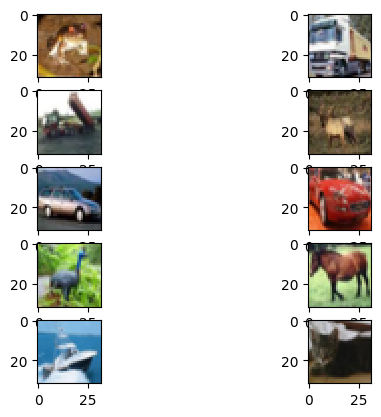

In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
(trainX,trainy),(testX,testy) =load_data()

for i in range(10):
  pyplot.subplot(5,2,1+i)
  # pyplot.axis("off")
  pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model #To visualise the arthitecture
import numpy as np

## Discriminator

In [ ]:
def define_discriminator(in_shape=(32,32,3)):
  model=Sequential()
  model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  opt=Adam(lr=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model



In [ ]:
model=define_discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

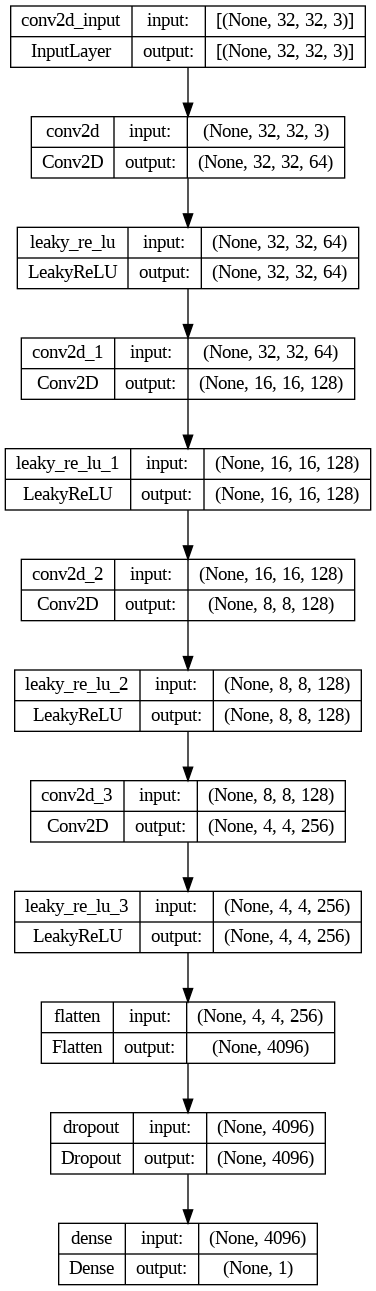

In [ ]:
plot_model(model,to_file="discriminator_plot.png",show_shapes=True,show_layer_names=True)

In [ ]:
def load_real_samples():
  (trainX,_),(_,_)=load_data()
  X=trainX.astype("float32")
  X=(X-127.5)/127.5 #[-1 to 1]
  return X

In [ ]:
X=load_real_samples()
X.shape

(50000, 32, 32, 3)

In [ ]:
X[0][0] #[-1 to 1]

array([[-0.5372549 , -0.5137255 , -0.5058824 ],
       [-0.6627451 , -0.6392157 , -0.64705884],
       [-0.60784316, -0.62352943, -0.6627451 ],
       [-0.46666667, -0.5764706 , -0.67058825],
       [-0.23137255, -0.42745098, -0.5921569 ],
       [-0.06666667, -0.28627452, -0.5058824 ],
       [ 0.09019608, -0.16078432, -0.4117647 ],
       [ 0.13725491, -0.13725491, -0.37254903],
       [ 0.16862746, -0.08235294, -0.3019608 ],
       [ 0.16862746, -0.05882353, -0.27058825],
       [ 0.02745098, -0.19215687, -0.39607844],
       [-0.01960784, -0.22352941, -0.40392157],
       [ 0.11372549, -0.09803922, -0.28627452],
       [ 0.12941177, -0.12156863, -0.3254902 ],
       [ 0.07450981, -0.1764706 , -0.38039216],
       [ 0.01176471, -0.23921569, -0.44313726],
       [ 0.07450981, -0.16862746, -0.38039216],
       [ 0.05098039, -0.16862746, -0.40392157],
       [-0.02745098, -0.23921569, -0.49803922],
       [ 0.09019608, -0.11372549, -0.3882353 ],
       [ 0.09019608, -0.12156863, -0.411

In [ ]:
def generate_real_samples(dataset,n_samples):
  ix=np.random.randint(0,dataset.shape[0],n_samples)
  X=dataset[ix]
  y=np.ones((n_samples,1))
  return X,y

In [ ]:
X,y=generate_real_samples(X,64)
print(X.shape)
print(y.shape)
print(X[1].shape,y[:10])

(64, 32, 32, 3)
(64, 1)
(32, 32, 3) [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
def generate_fake_samples(n_samples):
  X=np.random.rand(32*32*3*n_samples)
  # print(X)
  X=-1 + X * 2
  X=X.reshape((n_samples,32,32,3))
  y=np.zeros((n_samples,1))
  return X,y

In [ ]:
X,y=generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(X[0])

[0.74326808 0.65316935 0.82795321 ... 0.76474617 0.80070193 0.11790136]
(64, 32, 32, 3)
(64, 1)
[[[ 0.48653616  0.30633871  0.65590643]
  [ 0.30078657  0.39981749  0.23552717]
  [-0.70220007 -0.38554482 -0.7303528 ]
  ...
  [ 0.11013447 -0.87641775 -0.06085021]
  [-0.20913582 -0.74957519  0.70647849]
  [ 0.69985526  0.87380145  0.83109216]]

 [[-0.91924637  0.11058394 -0.30340089]
  [ 0.40415981 -0.55145346 -0.95434085]
  [-0.8477319   0.29391037  0.55387885]
  ...
  [-0.17117236  0.41966485 -0.33037691]
  [ 0.19585637 -0.0770216   0.18654784]
  [-0.99000619  0.11233631  0.00509346]]

 [[ 0.91033594 -0.95015733  0.08895904]
  [ 0.59459943 -0.84197038  0.50995537]
  [-0.78952546  0.29383021  0.43768633]
  ...
  [ 0.17540134 -0.48180798 -0.69631738]
  [ 0.56036107 -0.90602252  0.88166776]
  [-0.54223751  0.28095114 -0.99616126]]

 ...

 [[-0.98996326  0.08336752 -0.53872932]
  [ 0.00507313 -0.37666967  0.94376246]
  [ 0.13610094 -0.51600263 -0.78163628]
  ...
  [ 0.92487984 -0.25458696  

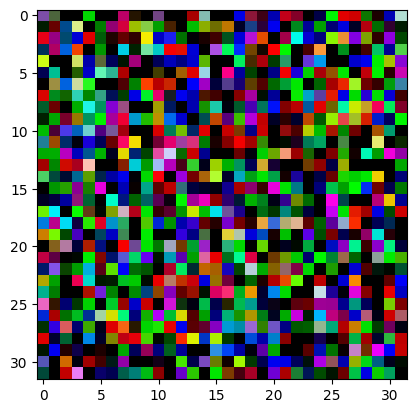

In [ ]:
pyplot.imshow(X[0])

In [ ]:
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
  half_batch=int(n_batch/2) # to send half real and half fake

  for i in range(n_iter):
    # REAL
    X_real,y_real=generate_real_samples(dataset,half_batch)
    _,real_acc=model.train_on_batch(X_real,y_real)
    # FAKE
    X_fake,y_fake=generate_fake_samples(half_batch)
    _,fake_acc=model.train_on_batch(X_fake,y_fake)

    print(f"{i+1} real={real_acc*100:.1f}% fake={fake_acc*100:.1f}%")

In [ ]:
model=define_discriminator()
dataset=load_real_samples()
train_discriminator(model,dataset)


1 real=25.0% fake=0.0%
2 real=93.8% fake=21.9%
3 real=93.8% fake=85.9%
4 real=96.9% fake=100.0%
5 real=98.4% fake=100.0%
6 real=96.9% fake=100.0%
7 real=100.0% fake=100.0%
8 real=100.0% fake=100.0%
9 real=100.0% fake=100.0%
10 real=100.0% fake=100.0%
11 real=100.0% fake=100.0%
12 real=100.0% fake=100.0%
13 real=100.0% fake=100.0%
14 real=100.0% fake=100.0%
15 real=100.0% fake=100.0%
16 real=100.0% fake=100.0%
17 real=100.0% fake=100.0%
18 real=100.0% fake=100.0%
19 real=100.0% fake=100.0%
20 real=100.0% fake=100.0%


## Generator

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils import plot_model

In [ ]:
def define_generator(latent_dim):
  model=Sequential()
  n_nodes=256*4*4
  #foundation for 4x4
  model.add(Dense(n_nodes,input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256))) #Reshaping cause further steps involves convulation and it needs to be in proper shape n dims
  #upscaling to 8x8
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #upsampling to 16x16
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #upsampling to 32x32
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  #output
  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
  return model

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 8, 8, 128)         524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                          

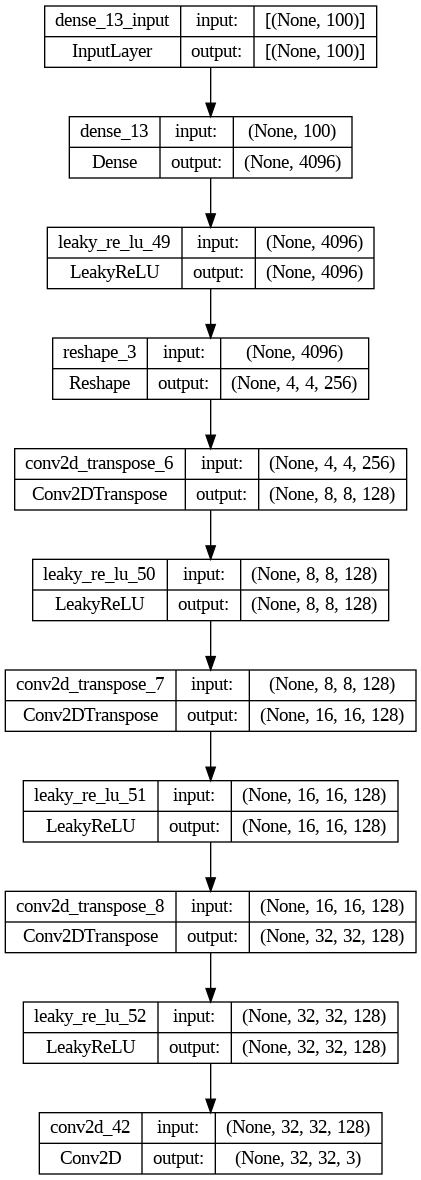

In [ ]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()
plot_model(model,to_file="generator_plot.png" ,show_shapes=True,show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim,n_samples):
  x_input=np.random.rand(latent_dim*n_samples)
  x_input=x_input.reshape(n_samples,latent_dim)
  return x_input

In [ ]:
x_input=generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [ ]:
def generate_fake_samples(g_model,latent_din,n_samples):
  x_input=generate_latent_points(latent_dim,n_samples)
  X=g_model.predict(x_input)
  y=np.zeros((n_samples,1))
  return X,y

2/2 [==============================] - 1s 168ms/step


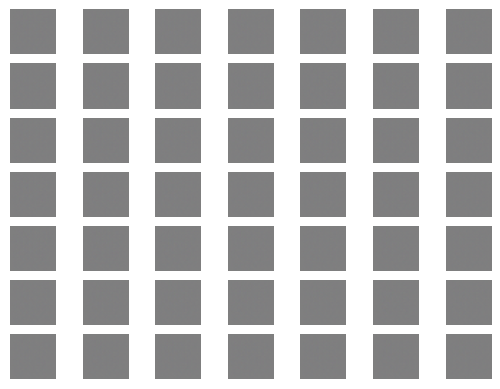

In [ ]:
latent_dim=100
model=define_generator(latent_dim)
n_samples=49
X,_=generate_fake_samples(model,latent_dim,n_samples)
X=(X+1)/2.0 #-1,1 to 0,1

for i in range(n_samples):
  pyplot.subplot(7,7,1+i)
  pyplot.axis("off")
  pyplot.imshow(X[i])
pyplot.show()

In [ ]:
def define_gan(g_model,d_model):
  d_model.trainbale=False

  model=Sequential()
  model.add(g_model)
  model.add(d_model)

  opt=Adam(lr=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt)
  return model

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 32, 32, 3)         1466115   
                                                                 
 sequential_20 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1988612 (7.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


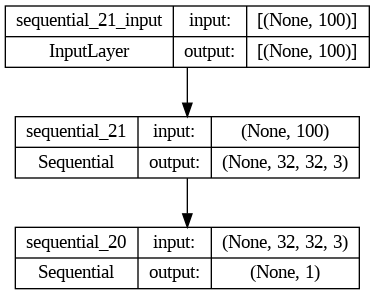

In [ ]:
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim)
gan_model=define_gan(g_model,d_model)
gan_model.summary()
plot_model(gan_model,to_file="gans_plot.png",show_shapes=True, show_layer_names=True)

In [ ]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch=128):
  bat_per_epo=int(dataset.shape[0]/n_batch)
  half_batch=int(n_batch/2)

  for i in range(n_epochs):
    for j in range(bat_per_epo):

      X_real,y_real=generate_real_samples(dataset,half_batch)
      d_loss1,_=d_model.train_on_batch(X_real,y_real)

      X_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
      d_loss2,_=d_model.train_on_batch(X_fake,y_fake)

      X_gan=generate_latent_points(latent_dim,n_batch)
      y_gan=np.ones((n_batch,1))

      g_loss=gan_model.train_on_batch(X_gan,y_gan)
      print(f"{i+1}/200, {j+1}/{bat_per_epo} ,d1:{d_loss1:.1f}, d2:{d_loss2:.1f} g:{g_loss:.1f}")
    if (i+1)%10 ==0:
      summarize_performance(i,g_model,d_model,dataset,latent_dim)



In [ ]:
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
  X_real,y_real=generate_real_samples(dataset,n_samples)
  _,acc_real=d_model.evaluate(X_real,y_real,verbose=0) #eva dis on real

  x_fake,y_fake=generate_fake_samples(g_model,latent_dim,n_samples)
  _,acc_fake=d.model.evaluate(x_fake,y_fake,verbose=0)

  print(f"Accuracy Real:{acc_real:,1f} Fake:{acc_fake:.1f}")
  save_plot(x_fake,epoch) #sving fake data generated over gen
  filename=f"generation_model_{epoch+1}"
  g_mode.save(filename)
  pyploy.savefig(filename)
  pyplot.close()


In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch=128)

2/2 [==============================] - 0s 209ms/step
1/200, 1/390 ,d1:0.4, d2:0.9 g:0.6
2/2 [==============================] - 0s 199ms/step
1/200, 2/390 ,d1:0.0, d2:3.0 g:0.5
2/2 [==============================] - 0s 194ms/step
1/200, 3/390 ,d1:0.0, d2:3.3 g:0.7
2/2 [==============================] - 0s 208ms/step
1/200, 4/390 ,d1:0.2, d2:1.3 g:0.7
2/2 [==============================] - 1s 309ms/step
1/200, 5/390 ,d1:0.2, d2:1.1 g:0.7
2/2 [==============================] - 0s 191ms/step
1/200, 6/390 ,d1:0.2, d2:0.9 g:0.7
2/2 [==============================] - 0s 191ms/step
1/200, 7/390 ,d1:0.1, d2:0.9 g:0.7
2/2 [==============================] - 0s 197ms/step
1/200, 8/390 ,d1:0.1, d2:0.9 g:0.7
2/2 [==============================] - 0s 193ms/step
1/200, 9/390 ,d1:0.1, d2:0.8 g:0.7
2/2 [==============================] - 0s 206ms/step
1/200, 10/390 ,d1:0.0, d2:0.8 g:0.7
2/2 [==============================] - 0s 205ms/step
1/200, 11/390 ,d1:0.0, d2:0.8 g:0.7
2/2 [=========================

KeyboardInterrupt: 